# Data Exploration

First, we are going to import all the libraries that we will be using in this notebook to explore the dataset.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data reading
We are going to read the data in a dataframe of pandas.

In [3]:
Orders = pd.read_excel("superstore_09bda538-16bc-4a44-900e-e9aa17815298.xls", sheet_name="Orders")

Now, we are going to explore the data.

In [4]:
#Info of the dataset
Orders.info()
#Statistic info of the dataset
Orders.describe()
#Head of the dataset
Orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Viz

In order to understand the data and its complexity, we are going to realize some visualization



<Figure size 800x600 with 0 Axes>

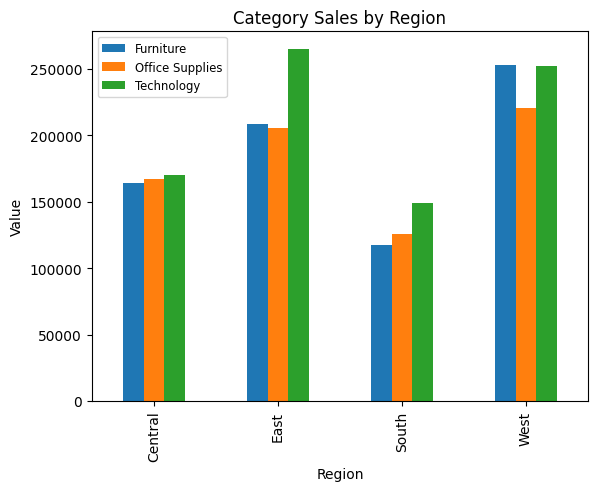

In [5]:
Orders.set_index("Row ID")
#Prepare first dataset
sales_region = Orders.groupby(["Category", "Region"])["Sales"].sum().reset_index()
#Pivot table for create de datviz
pivot_sales_region = sales_region.pivot(index='Region', columns='Category', values='Sales')

# Create the bar plot
plt.figure(figsize=(8,6))

pivot_sales_region.plot(kind='bar')


plt.legend(fontsize = "small")
plt.title('Category Sales by Region')
plt.xlabel('Region')
plt.ylabel('Value')

plt.show()

In the previous plot, it is evident that the category with the highest sales across most regions is "Technology". However, in the **West** region, the category with the highest sales is "Furniture", albeit with slightly less than one thousand sales.

Now, we are interested in the clients who buy more of each product and also want to make a comparison with the most frequent buyers per product and per region.

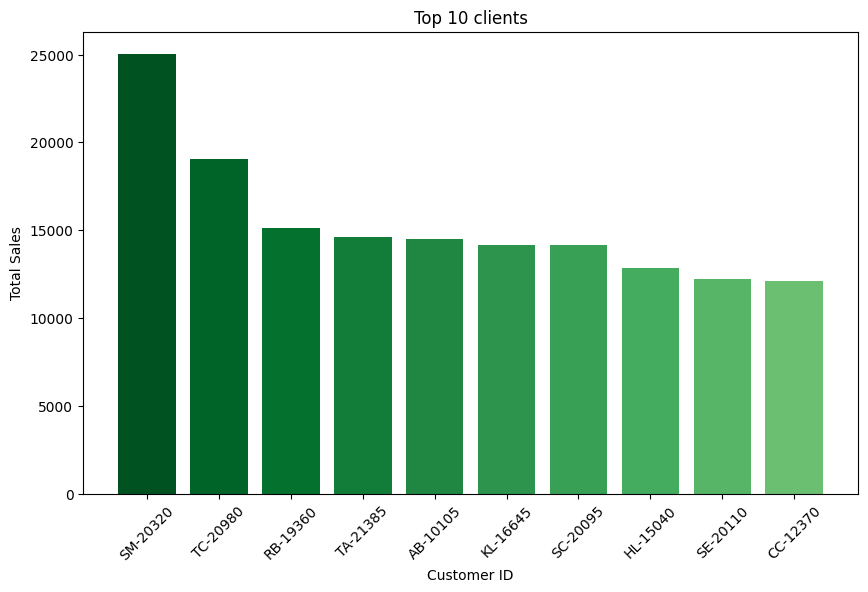

In [28]:
#We creare a new dataframe
selected_columns = ["Customer ID", 'Region', 'Category', 'Sales', 'Quantity']
clients = Orders[selected_columns]
#First we want to know the top 10 clients in all the country
sales_per_client = clients.groupby("Customer ID")["Sales"].sum().sort_values(ascending= False)
top_10_clients = sales_per_client.head(10) 

# Figure size
plt.figure(figsize=(10, 6))

# Create a descending color palette
colors = sns.color_palette("Greens", len(top_10_clients)*2)

# Plot the barplot
plt.bar(top_10_clients.index, top_10_clients.values, color=colors[::-1])

# Customize plot
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.title("Top 10 clients")

# Rotate the tags to making them readable
plt.xticks(rotation=45)



# Show
plt.show()

In [75]:
#Try and error
pivot_sales_region.loc["West"]

Category
Furniture          252612.7435
Office Supplies    220853.2490
Technology         251991.8320
Name: West, dtype: float64

In [11]:
#Check variables
Orders.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
pip install seaborn


                                              0.0/293.3 kB ? eta -:--:--
     ---------------                        122.9/293.3 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 4.5 MB/s eta 0:00:00
